Computes relative vorticity

In [1]:
import xarray as xr
import cmocean
from xnemogcm import open_nemo_and_domain_cfg, open_domain_cfg, get_metrics
import xgcm

Load in data using xnemogcm

In [2]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/production/OUTPUTS/'
nemo_files = ['MINT_1d_00620301_00620330_grid_U.nc',
              'MINT_1d_00620301_00620330_grid_V.nc']

mask_path = ['~/Python/AI4PEX/DINO/mesh_mask_exp16.nc']

In [3]:
nemo_paths = [directory + f for f in nemo_files]
ds = open_nemo_and_domain_cfg(nemo_files=nemo_paths,
                              domcfg_files=mask_path)

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [4]:
ds

<xarray.Dataset>
Dimensions:              (z_c: 36, axis_nbounds: 2, t: 30, y_c: 3183, x_f: 802,
                          y_f: 3183, x_c: 802, z_f: 36)
Coordinates: (12/20)
    time_instant         (t) object dask.array<chunksize=(1,), meta=np.ndarray>
  * t                    (t) object 0062-03-02 00:00:00 ... 0062-04-01 00:00:00
  * x_f                  (x_f) float64 0.5 1.5 2.5 3.5 ... 799.5 800.5 801.5
  * y_c                  (y_c) int64 0 1 2 3 4 5 ... 3178 3179 3180 3181 3182
    gdept_1d             (z_c) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * z_c                  (z_c) int64 0 1 2 3 4 5 6 7 ... 28 29 30 31 32 33 34 35
    ...                   ...
    gphit                (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gphif                (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gdepw_1d             (z_f) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gdept_0              (z_c, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    gdepw_0              (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
  * z_f                  (z_f) float64 -0.5 0.5 1.5 2.5 ... 31.5 32.5 33.5 34.5
Dimensions without coordinates: axis_nbounds
Data variables: (12/34)
    depthu_bounds        (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    time_instant_bounds  (t, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    t_bounds             (t, axis_nbounds) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    uo                   (t, z_c, y_c, x_f) float32 dask.array<chunksize=(1, 36, 3183, 802), meta=np.ndarray>
    depthv_bounds        (z_c, axis_nbounds) float32 dask.array<chunksize=(36, 2), meta=np.ndarray>
    vo                   (t, z_c, y_f, x_c) float32 dask.array<chunksize=(1, 36, 3183, 802), meta=np.ndarray>
    ...                   ...
    e3u_0                (z_c, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3v_0                (z_c, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3f_0                (z_c, y_f, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3w_0                (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3uw_0               (z_f, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3vw_0               (z_f, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
Attributes: (12/13)
    Conventions:  CF-1.6
    name:         NEMO dataset
    description:  Ocean grid variables, set on the proper positions
    title:        Ocean grid variables
    CfgName:      DINO
    CfgIndex:     0
    ...           ...
    Jperio:       0
    NFold:        0
    NFtype:       -
    VertCoord:    zco
    IsfCav:       0
    TimeStamp:    21/12/2025 08:05:25 +0000

Subset dataset

In [5]:
ds_ss = ds.isel(t=0,z_c=0)
ds_ss

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, y_c: 3183, x_f: 802, y_f: 3183,
                          x_c: 802, z_f: 36)
Coordinates: (12/20)
    time_instant         object dask.array<chunksize=(), meta=np.ndarray>
    t                    object 0062-03-02 00:00:00
  * x_f                  (x_f) float64 0.5 1.5 2.5 3.5 ... 799.5 800.5 801.5
  * y_c                  (y_c) int64 0 1 2 3 4 5 ... 3178 3179 3180 3181 3182
    gdept_1d             float64 dask.array<chunksize=(), meta=np.ndarray>
    z_c                  int64 0
    ...                   ...
    gphit                (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gphif                (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gdepw_1d             (z_f) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    gdept_0              (y_c, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gdepw_0              (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
  * z_f                  (z_f) float64 -0.5 0.5 1.5 2.5 ... 31.5 32.5 33.5 34.5
Dimensions without coordinates: axis_nbounds
Data variables: (12/34)
    depthu_bounds        (axis_nbounds) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    time_instant_bounds  (axis_nbounds) object dask.array<chunksize=(2,), meta=np.ndarray>
    t_bounds             (axis_nbounds) object dask.array<chunksize=(2,), meta=np.ndarray>
    uo                   (y_c, x_f) float32 dask.array<chunksize=(3183, 802), meta=np.ndarray>
    depthv_bounds        (axis_nbounds) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    vo                   (y_f, x_c) float32 dask.array<chunksize=(3183, 802), meta=np.ndarray>
    ...                   ...
    e3u_0                (y_c, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    e3v_0                (y_f, x_c) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    e3f_0                (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    e3w_0                (z_f, y_c, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3uw_0               (z_f, y_c, x_f) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
    e3vw_0               (z_f, y_f, x_c) float64 dask.array<chunksize=(1, 135, 206), meta=np.ndarray>
Attributes: (12/13)
    Conventions:  CF-1.6
    name:         NEMO dataset
    description:  Ocean grid variables, set on the proper positions
    title:        Ocean grid variables
    CfgName:      DINO
    CfgIndex:     0
    ...           ...
    Jperio:       0
    NFold:        0
    NFtype:       -
    VertCoord:    zco
    IsfCav:       0
    TimeStamp:    21/12/2025 08:05:25 +0000

Set up xgcm grid

In [6]:
# set up the xgcm grid
grid = xgcm.Grid(ds, metrics=get_metrics(ds), periodic=True)

In [10]:
bd = {'boundary': 'fill', 'fill_value': 0}

In [11]:
zeta = 1/(ds_ss.e1f*ds_ss.e2f) * \
            (grid.diff(ds_ss.vo*ds_ss.e2v, 'X', **bd) \
             - grid.diff(ds_ss.uo*ds_ss.e1u, 'Y', **bd))

/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
/home/users/twilder/Python/pyCDFTOOLS/lib/python3.12/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


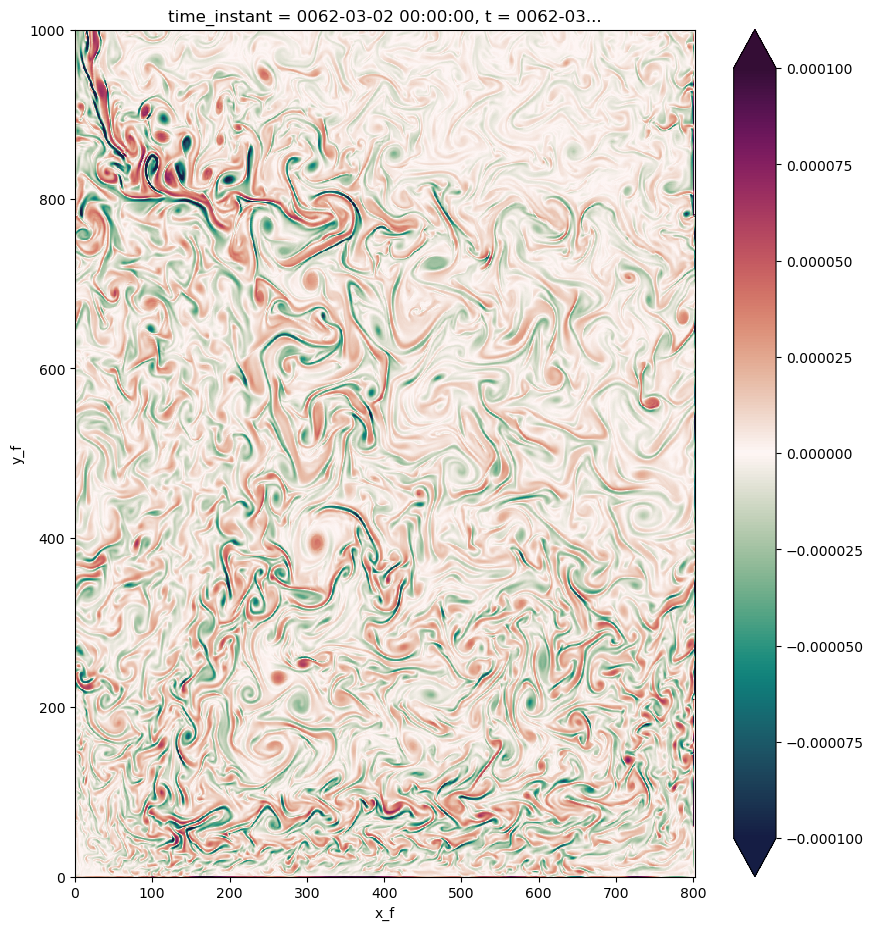

In [17]:
zeta.isel(y_f=slice(0,1000)).plot(figsize=(10,11), vmin=-1e-4, vmax=1e-4, cmap=cmocean.cm.curl)

In [22]:
ds_zeta = zeta.to_dataset(name='vor')
ds_zeta

<xarray.Dataset>
Dimensions:       (x_f: 802, y_f: 3183)
Coordinates:
    time_instant  object dask.array<chunksize=(), meta=np.ndarray>
    t             object 0062-03-02 00:00:00
  * x_f           (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 798.5 799.5 800.5 801.5
    gdept_1d      float64 dask.array<chunksize=(), meta=np.ndarray>
    z_c           int64 0
  * y_f           (y_f) float64 0.5 1.5 2.5 3.5 ... 3.18e+03 3.182e+03 3.182e+03
    glamf         (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
    gphif         (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>
Data variables:
    vor           (y_f, x_f) float64 dask.array<chunksize=(135, 206), meta=np.ndarray>

In [23]:
save_directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/'
ds_zeta.to_netcdf(save_directory + 'relative_vorticity_test.nc')